In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Get training property info

filename = 'Data/train_2016.csv'
trainid_df = pd.read_csv(filename)

# Get property info

colsToUse = ['parcelid', 'latitude', 'longitude', 'yearbuilt']
filename = 'Data/properties_2016.csv'
properties_df = pd.read_csv(filename, usecols = colsToUse)

In [3]:
# Put respective properties_df info into train_df.

properties_df.set_index('parcelid', inplace = True)
trainid_df.set_index('parcelid', inplace = True)

all_df = trainid_df.join(properties_df)

In [4]:
# Only use the necessary data.

all_df = all_df[['logerror', 'latitude', 'longitude', 'yearbuilt']]
all_df = all_df.dropna()

npoints = len(all_df.logerror.values)
origerror = np.mean(np.abs(all_df.logerror.values))

In [5]:
# Make function for binning values in an array

def makebins(X, nbins = 50):
    X2 = X.copy()
    maxval = np.amax(X2)
    minval = np.amin(X2)
    X2 = (X2 - minval) / (maxval - minval) * nbins
    X2 = X2.astype(int)
    X2 = minval + X2 * (maxval - minval) / nbins
    return X2

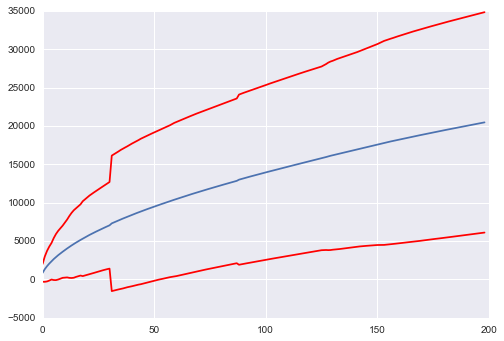

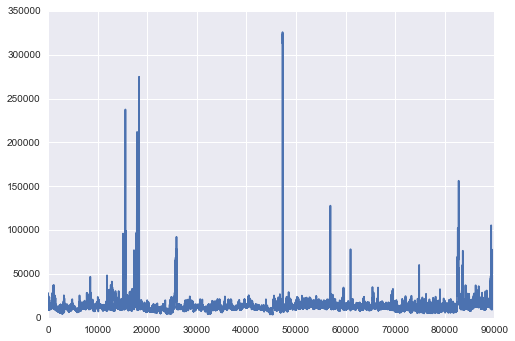

In [39]:
# Get statistics on neighbors for yearbuilt and distance

k = 200

coords = all_df[['latitude', 'longitude']].values
nbrs = NearestNeighbors()
nbrs.fit(coords)

nbrdistance, nbrindex = nbrs.kneighbors(coords, n_neighbors = k)
nbrdistance = nbrdistance[:,1:]
nbrindex = nbrindex[:,1:]

meandistance = np.mean(nbrdistance, axis = 0)
stddistance = np.std(nbrdistance, axis = 0)
plt.plot(meandistance)
plt.plot(meandistance + stddistance, color = 'red')
plt.plot(meandistance - stddistance, color = 'red')
plt.show()

meandistance = np.mean(nbrdistance, axis = 1)
plt.plot(meandistance)
plt.show()

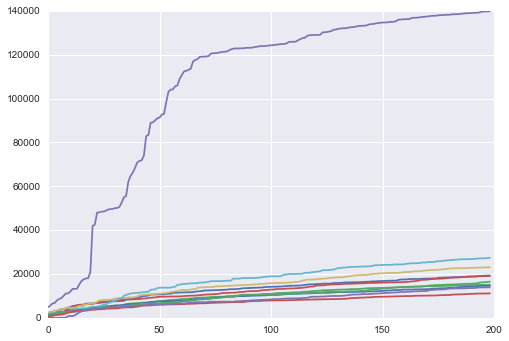

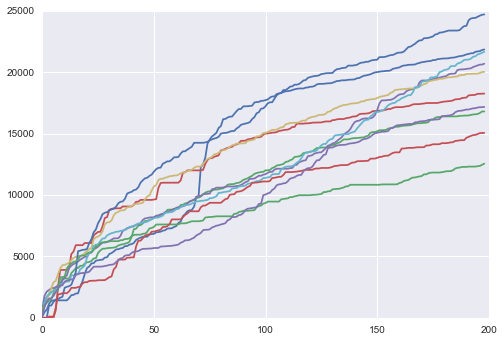

In [48]:
# Look at some graphs of neighbordistance.
rows = [39443, 26731, 86762, 17919, 57678,  7432,  6010, 73658, 20642, 47720]
#rows = np.random.randint(len(nbrdistance), size = 10)

Y = nbrdistance[rows]
for row in Y:
    plt.plot(row)
plt.show()

rows = [73565, 60366, 43489,  7169, 58025, 17280, 58166, 22021, 33973, 70549]
Y = nbrdistance[rows]
for row in Y:
    plt.plot(row)
plt.show()


In [ ]:
# Let's try to find the rows in neighbor distance with the step phenomenon.

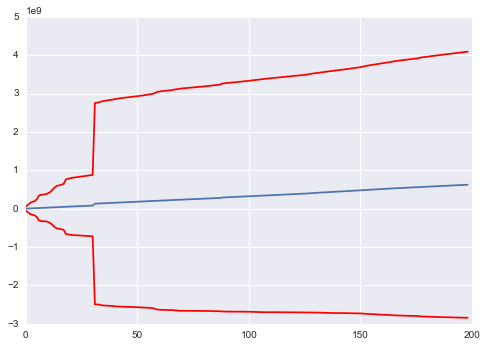

In [44]:
meandistance = np.mean(nbrdistance**2, axis = 0)
stddistance = np.std(nbrdistance**2, axis = 0)
plt.plot(meandistance)
plt.plot(meandistance + stddistance, color = 'red')
plt.plot(meandistance - stddistance, color = 'red')
plt.show()

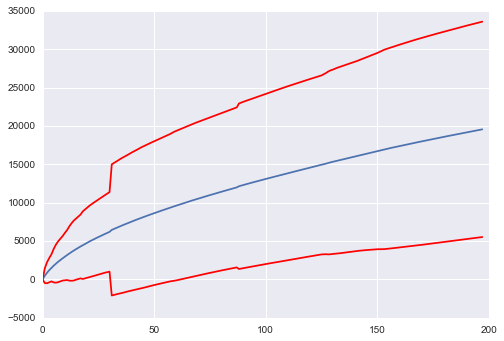

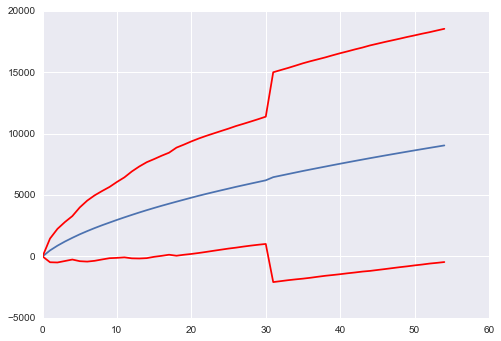

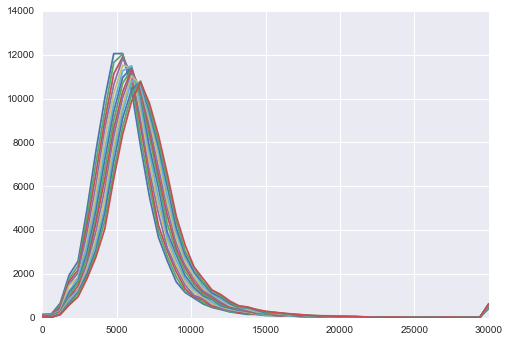

In [45]:
# Get information on total difference for different numbers of neighbors.

numrows, numcols = nbrdistance.shape
X = nbrdistance[:, 1:] - nbrdistance[:, :-1]
numintervals = range(numcols - 1)

# Get graphs of average plus/minus standard deviation.

averages = []
stddev = []

for numint in numintervals:
    Y = X[:, :numint].copy()
    Y = np.sum(Y, axis = 1)
    averages.append(np.mean(Y))
    stddev.append(np.std(Y))
    
averages = np.array(averages)
stddev = np.array(stddev)

plt.plot(averages)
plt.plot(averages + stddev, color = 'red')
plt.plot(averages - stddev, color = 'red')
plt.show()

plt.plot(averages[:55])
plt.plot(averages[:55] + stddev[:55], color = 'red')
plt.plot(averages[:55] - stddev[:55], color = 'red')
plt.show()

# Now get  profiles for certain numintervals.

numintervals = range(30,45,1)
lowcutoff = -1 * 10*1
highcutoff = 3 * 10**4
for numint in numintervals:
    Y = X[:, :numint].copy()
    Y = np.sum(Y,axis = 1)
    Y[Y < lowcutoff] = lowcutoff
    Y[Y > highcutoff] = highcutoff
    Y = makebins(Y, nbins = 50)
    values, counts = np.unique(Y, return_counts = True)
    plt.plot(values, counts)
plt.show()

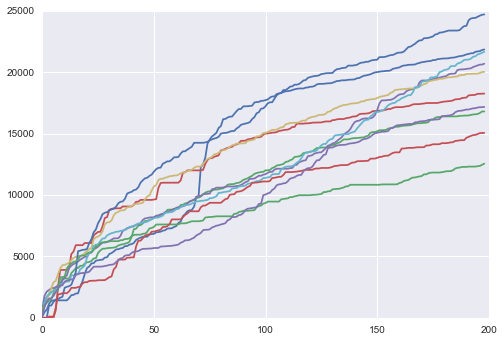

array([73565, 60366, 43489,  7169, 58025, 17280, 58166, 22021, 33973, 70549])

In [47]:
# Look at some graphs of neighbordistance.

rows = np.random.randint(len(nbrdistance), size = 10)

Y = nbrdistance[rows]
for row in Y:
    plt.plot(row)
plt.show()

rows

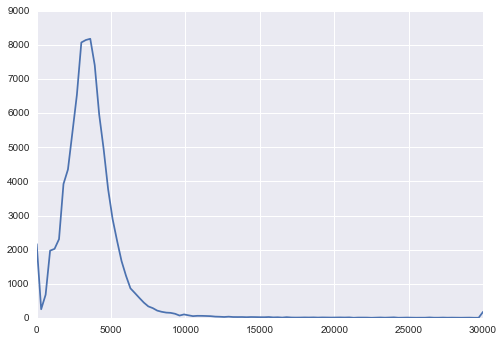

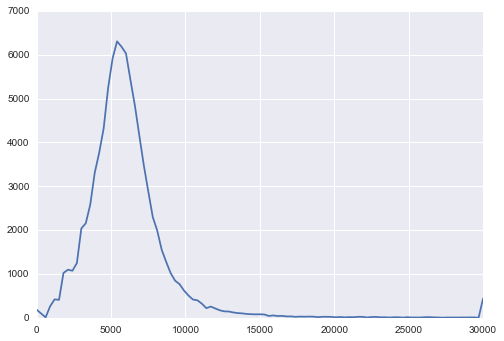

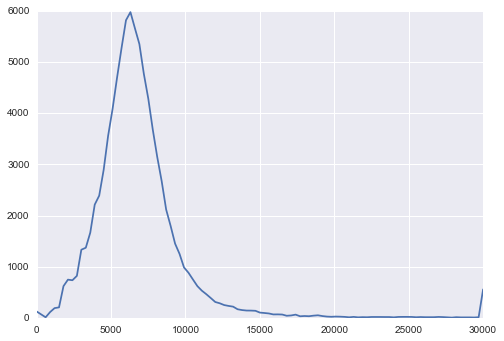

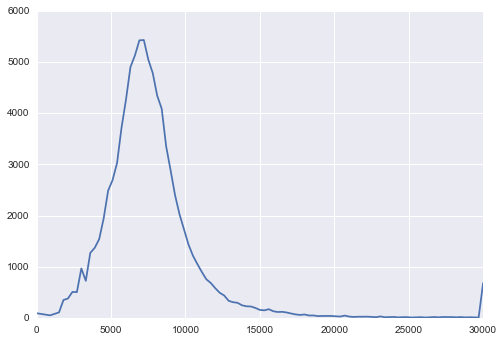

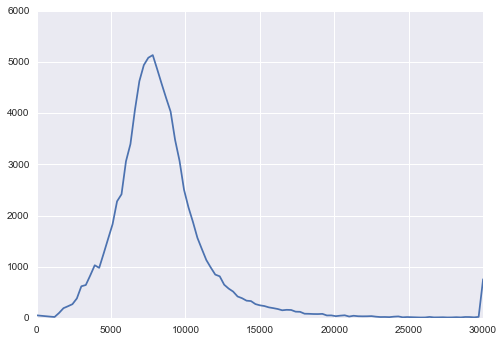

In [33]:
nbrnumbers = [10, 25, 31, 38, 45]

for nbrnumber in nbrnumbers:
    X = nbrdistance[:, nbrnumber]
    X[X > 3 * 10**4] = 3 * 10**4
    X = makebins(X, nbins = 100)
    values, counts = np.unique(X, return_counts = True)
    plt.plot(values, counts)
    plt.show()


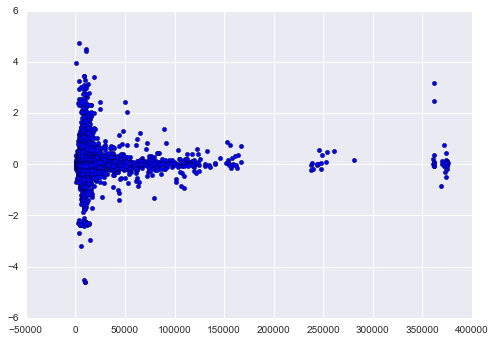

In [9]:
# Look at nbrdistance of 35 versus logerror

X = nbrdistance[:, 54]
y = all_df.logerror.values

plt.scatter(X, y)
plt.show()

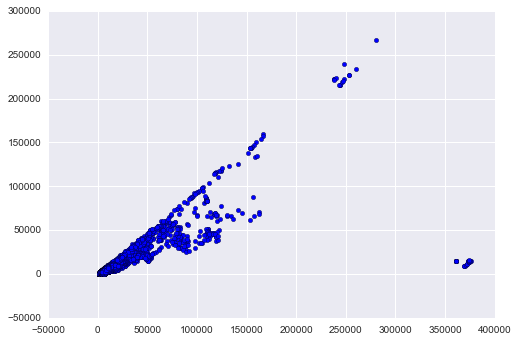

In [10]:
# Look at nbrdistance of 35 versus logerror

X = nbrdistance[:, 54]
y = nbrdistance[:, 24]

plt.scatter(X, y)
plt.show()

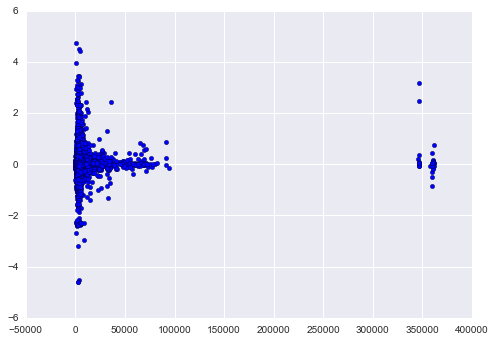

In [11]:
# Look at nbrdistance of 35 versus logerror

X = nbrdistance[:, 54] - nbrdistance[:, 24]
#X[X > 10**5] = 10**5
y = all_df.logerror.values

plt.scatter(X, y)
plt.show()

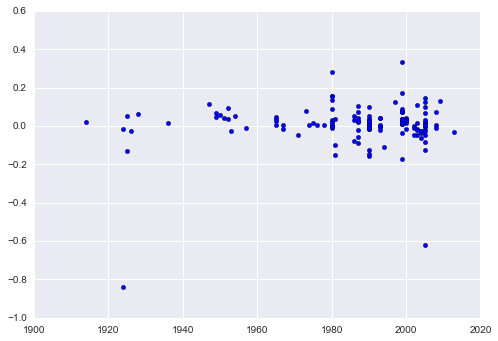

In [12]:
# Look at logerror vs yearbuilt for difference in nbrdistance small

filtervals = nbrdistance[:, 54] - nbrdistance[:, 24]
X = all_df.yearbuilt.values
y = all_df.logerror.values
indices = (filtervals < 0.5*10**3)
X = X[indices]
y = y[indices]

plt.scatter(X,y)
plt.show()

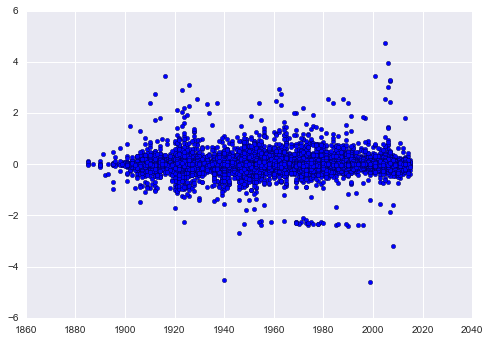

In [13]:
# Look at logerror vs yearbuilt for small nbrdistance for large neighbor number

filtervals = nbrdistance[:, 54]
X = all_df.yearbuilt.values
y = all_df.logerror.values
indices = (filtervals < 1*10**4)
X = X[indices]
y = y[indices]

plt.scatter(X,y)
plt.show()

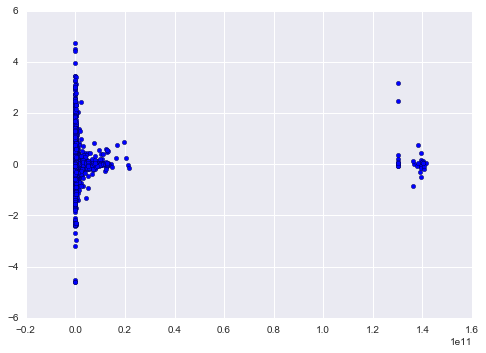

(89519,)
(89519,)


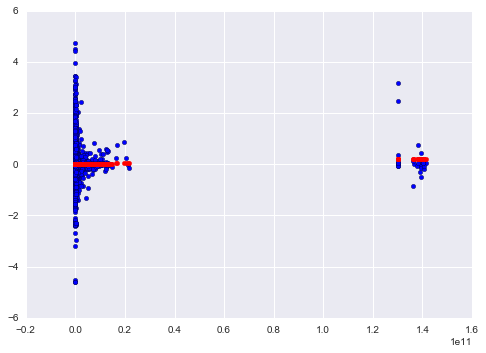

0.0679144696235


In [14]:
# Look at nbrdistance of 35 versus logerror

X = nbrdistance[:, 54]**2 - nbrdistance[:, 24]**2
#X[X < 0.6 * 10**11] = 0.6 * 10**11
y = all_df.logerror.values

plt.scatter(X, y)
plt.show()

print(X.shape)
print(y.shape)
linregr = linear_model.LinearRegression()
linregr.fit(X.reshape(-1,1),y.reshape(-1,1))
yp = linregr.predict(X.reshape(-1,1))
plt.scatter(X,y)
plt.scatter(X, yp, color = 'red')
plt.show()

error = np.abs(yp - y.reshape(-1,1))
error = np.mean(error)
print(error)
